In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import RFECV
from sklearn.tree import plot_tree, export_graphviz
import matplotlib.pyplot as plt

# 1. Base de dados com contações após 1, 2, 3, 4 e 5 anos

In [2]:
df = pd.read_csv('Datasets/transformation_result_SD.csv')

In [3]:
x = df.drop('Open_1', axis=1)
y = df['Open_1']

## 1. Seleção dos atributos mais significativos (no mínimo 5)

In [4]:
rfecv = RFECV(DecisionTreeRegressor(max_depth=5), min_features_to_select=5, cv=5)

In [5]:
x_r = rfecv.fit_transform(x,y)

c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


## 2. Aplicação de validação cruzada

In [6]:
cv_result = cross_val_score(DecisionTreeRegressor(max_depth=5), x_r, y, scoring='r2', cv=5)

In [7]:
cv_result

array([0.15281351, 0.19241607, 0.3828679 , 0.64198895, 0.39150268])

## 3. Novamente a execução do treinamento com árvore de decisão
Após a execução, uma visualização gráfica da árvore é gerada.

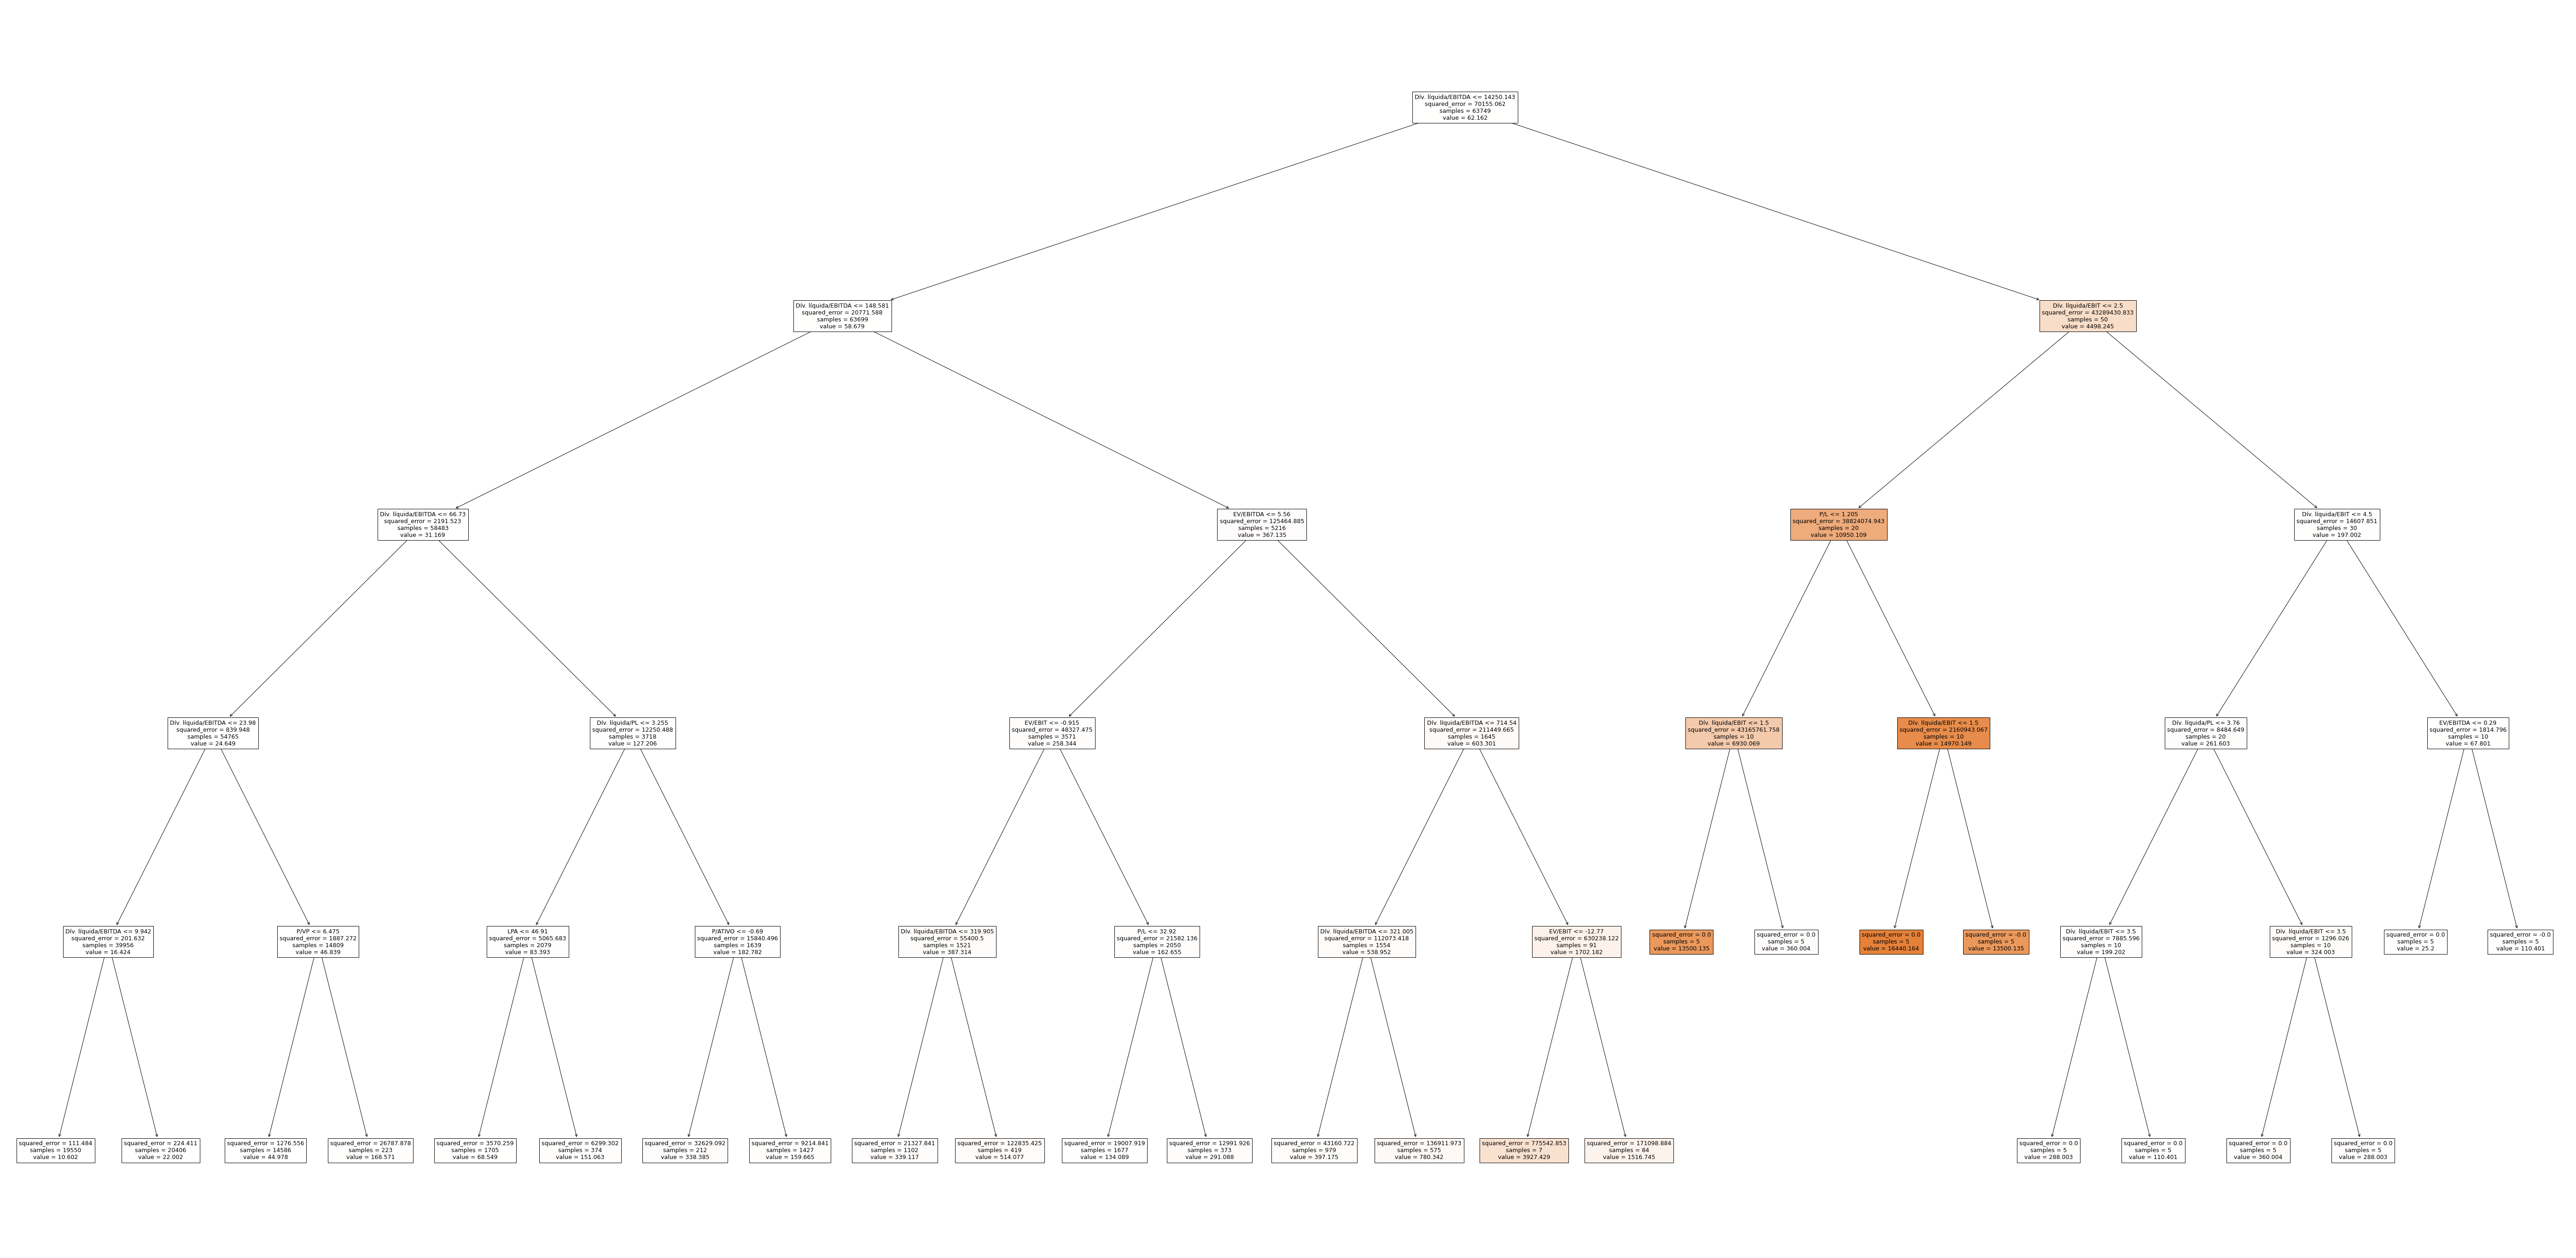

In [8]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(x_r,y)

fig = plt.figure(figsize=(100,50))
_ = plot_tree(tree, 
                   feature_names=x.columns,  
                   filled=True)
plt.savefig("Trees\\tree.jpeg", bbox_inches='tight')

# 2. Toda a rotina é repetida para as demais base de dados

In [9]:
dfs = [pd.read_csv('Datasets/transformation_result_1_year_SD.csv'),
       pd.read_csv('Datasets/transformation_result_2_year_SD.csv'),
       pd.read_csv('Datasets/transformation_result_3_year_SD.csv'),
       pd.read_csv('Datasets/transformation_result_4_year_SD.csv'),
       pd.read_csv('Datasets/transformation_result_5_year_SD.csv')]

c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


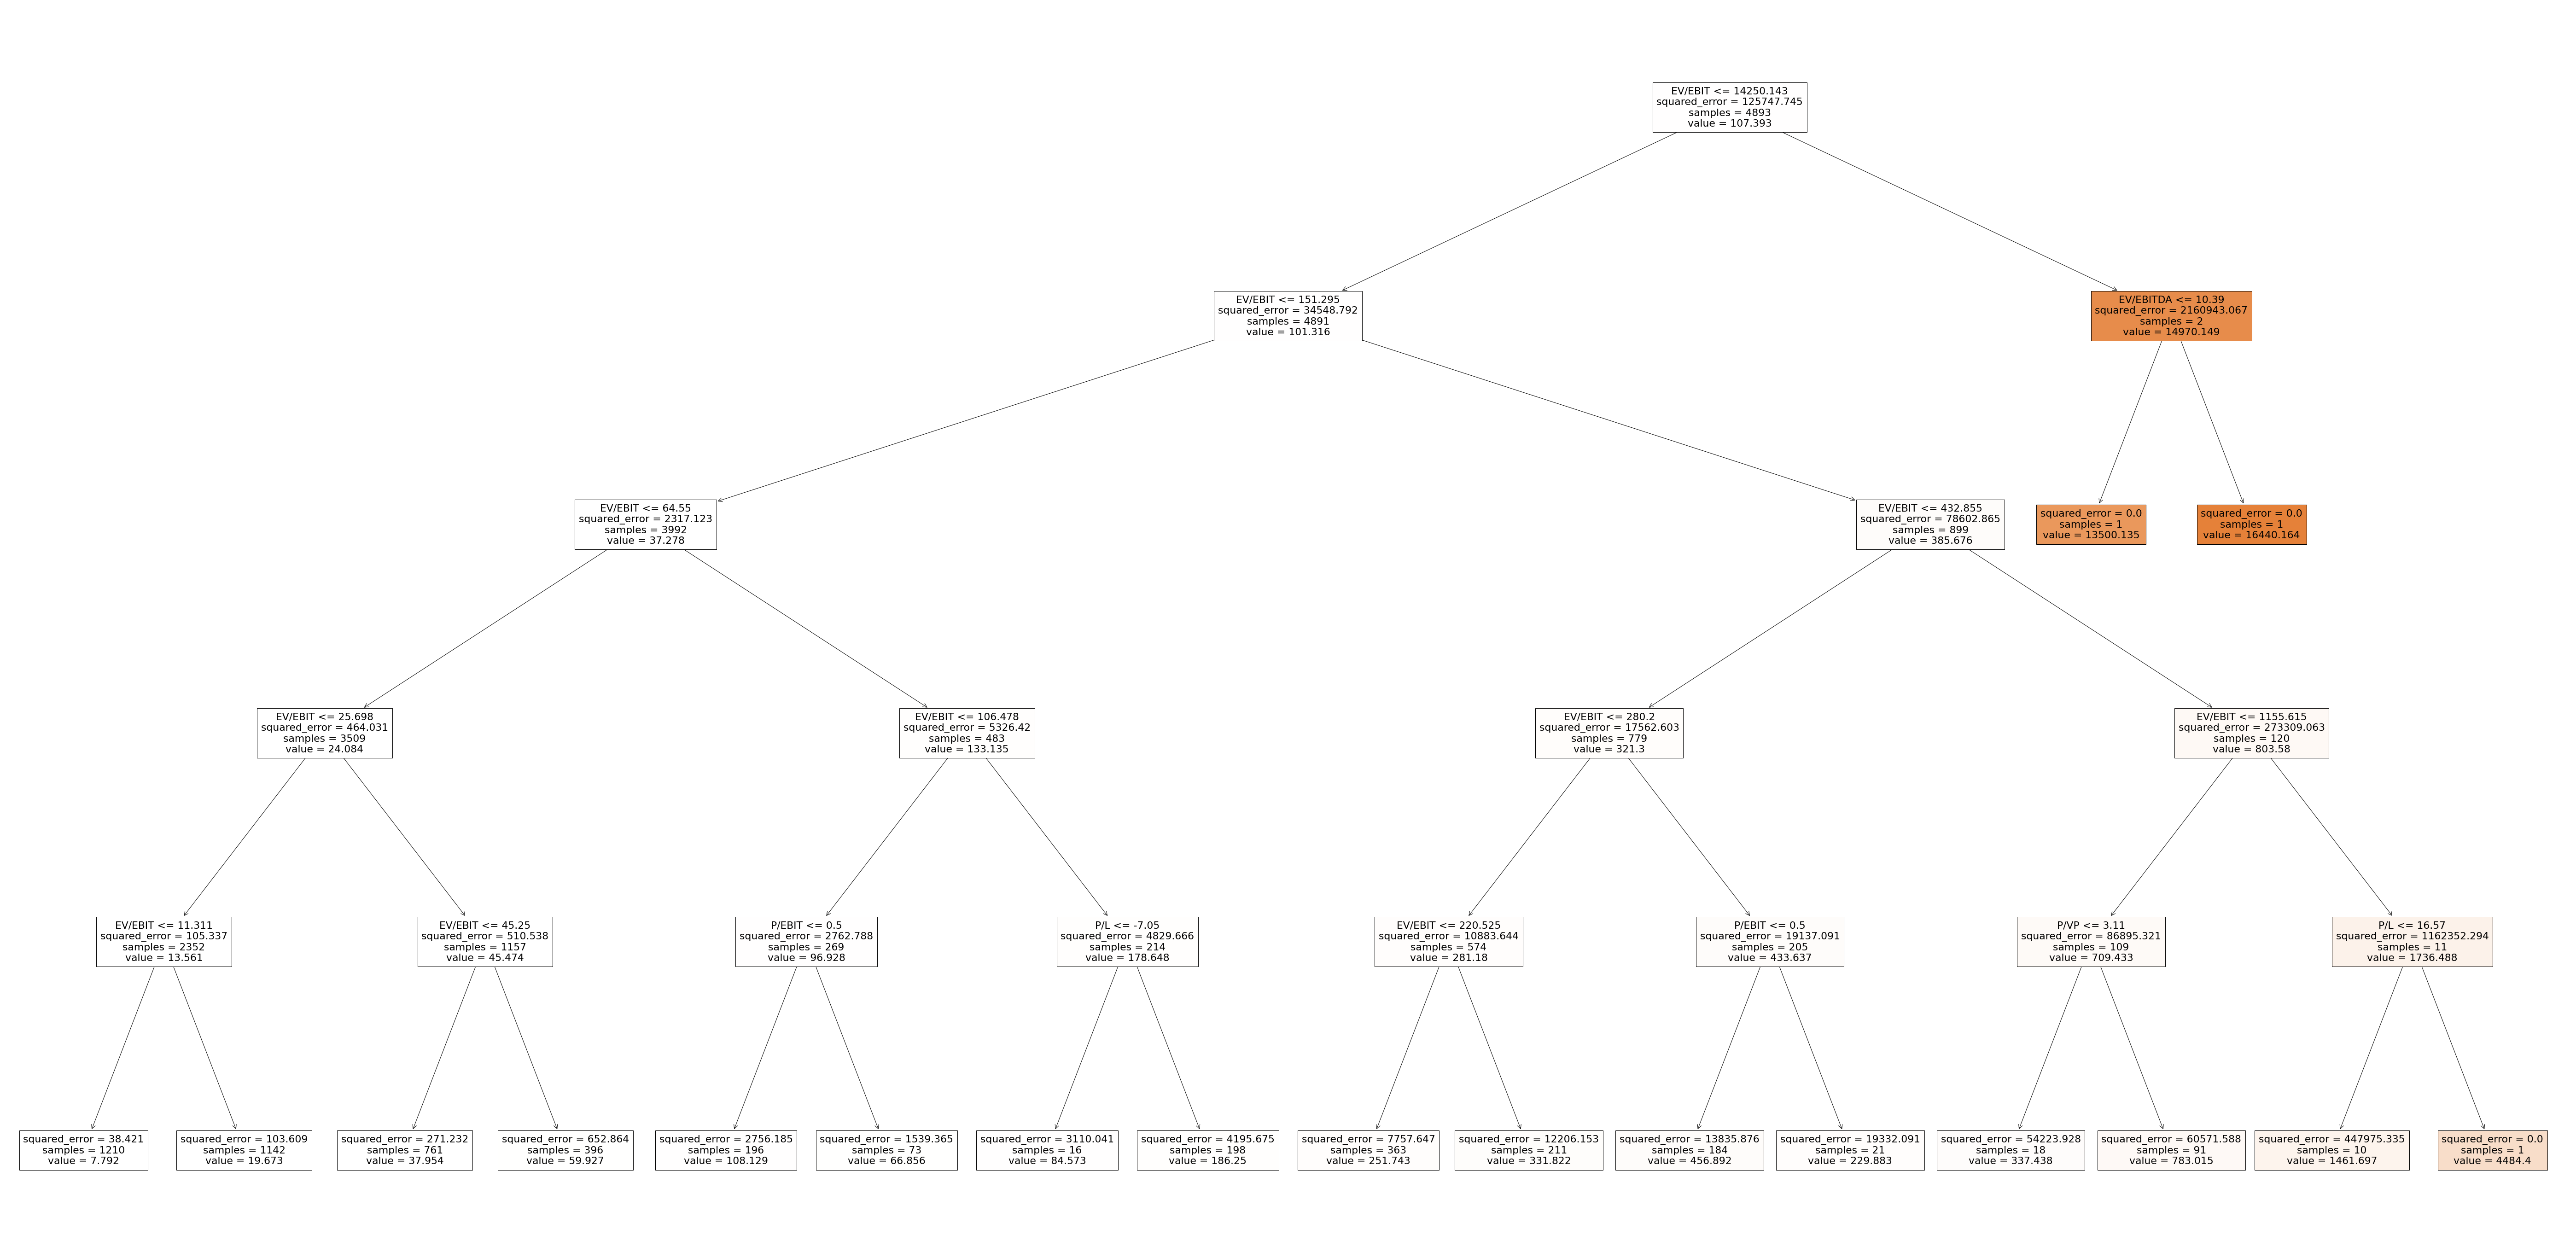

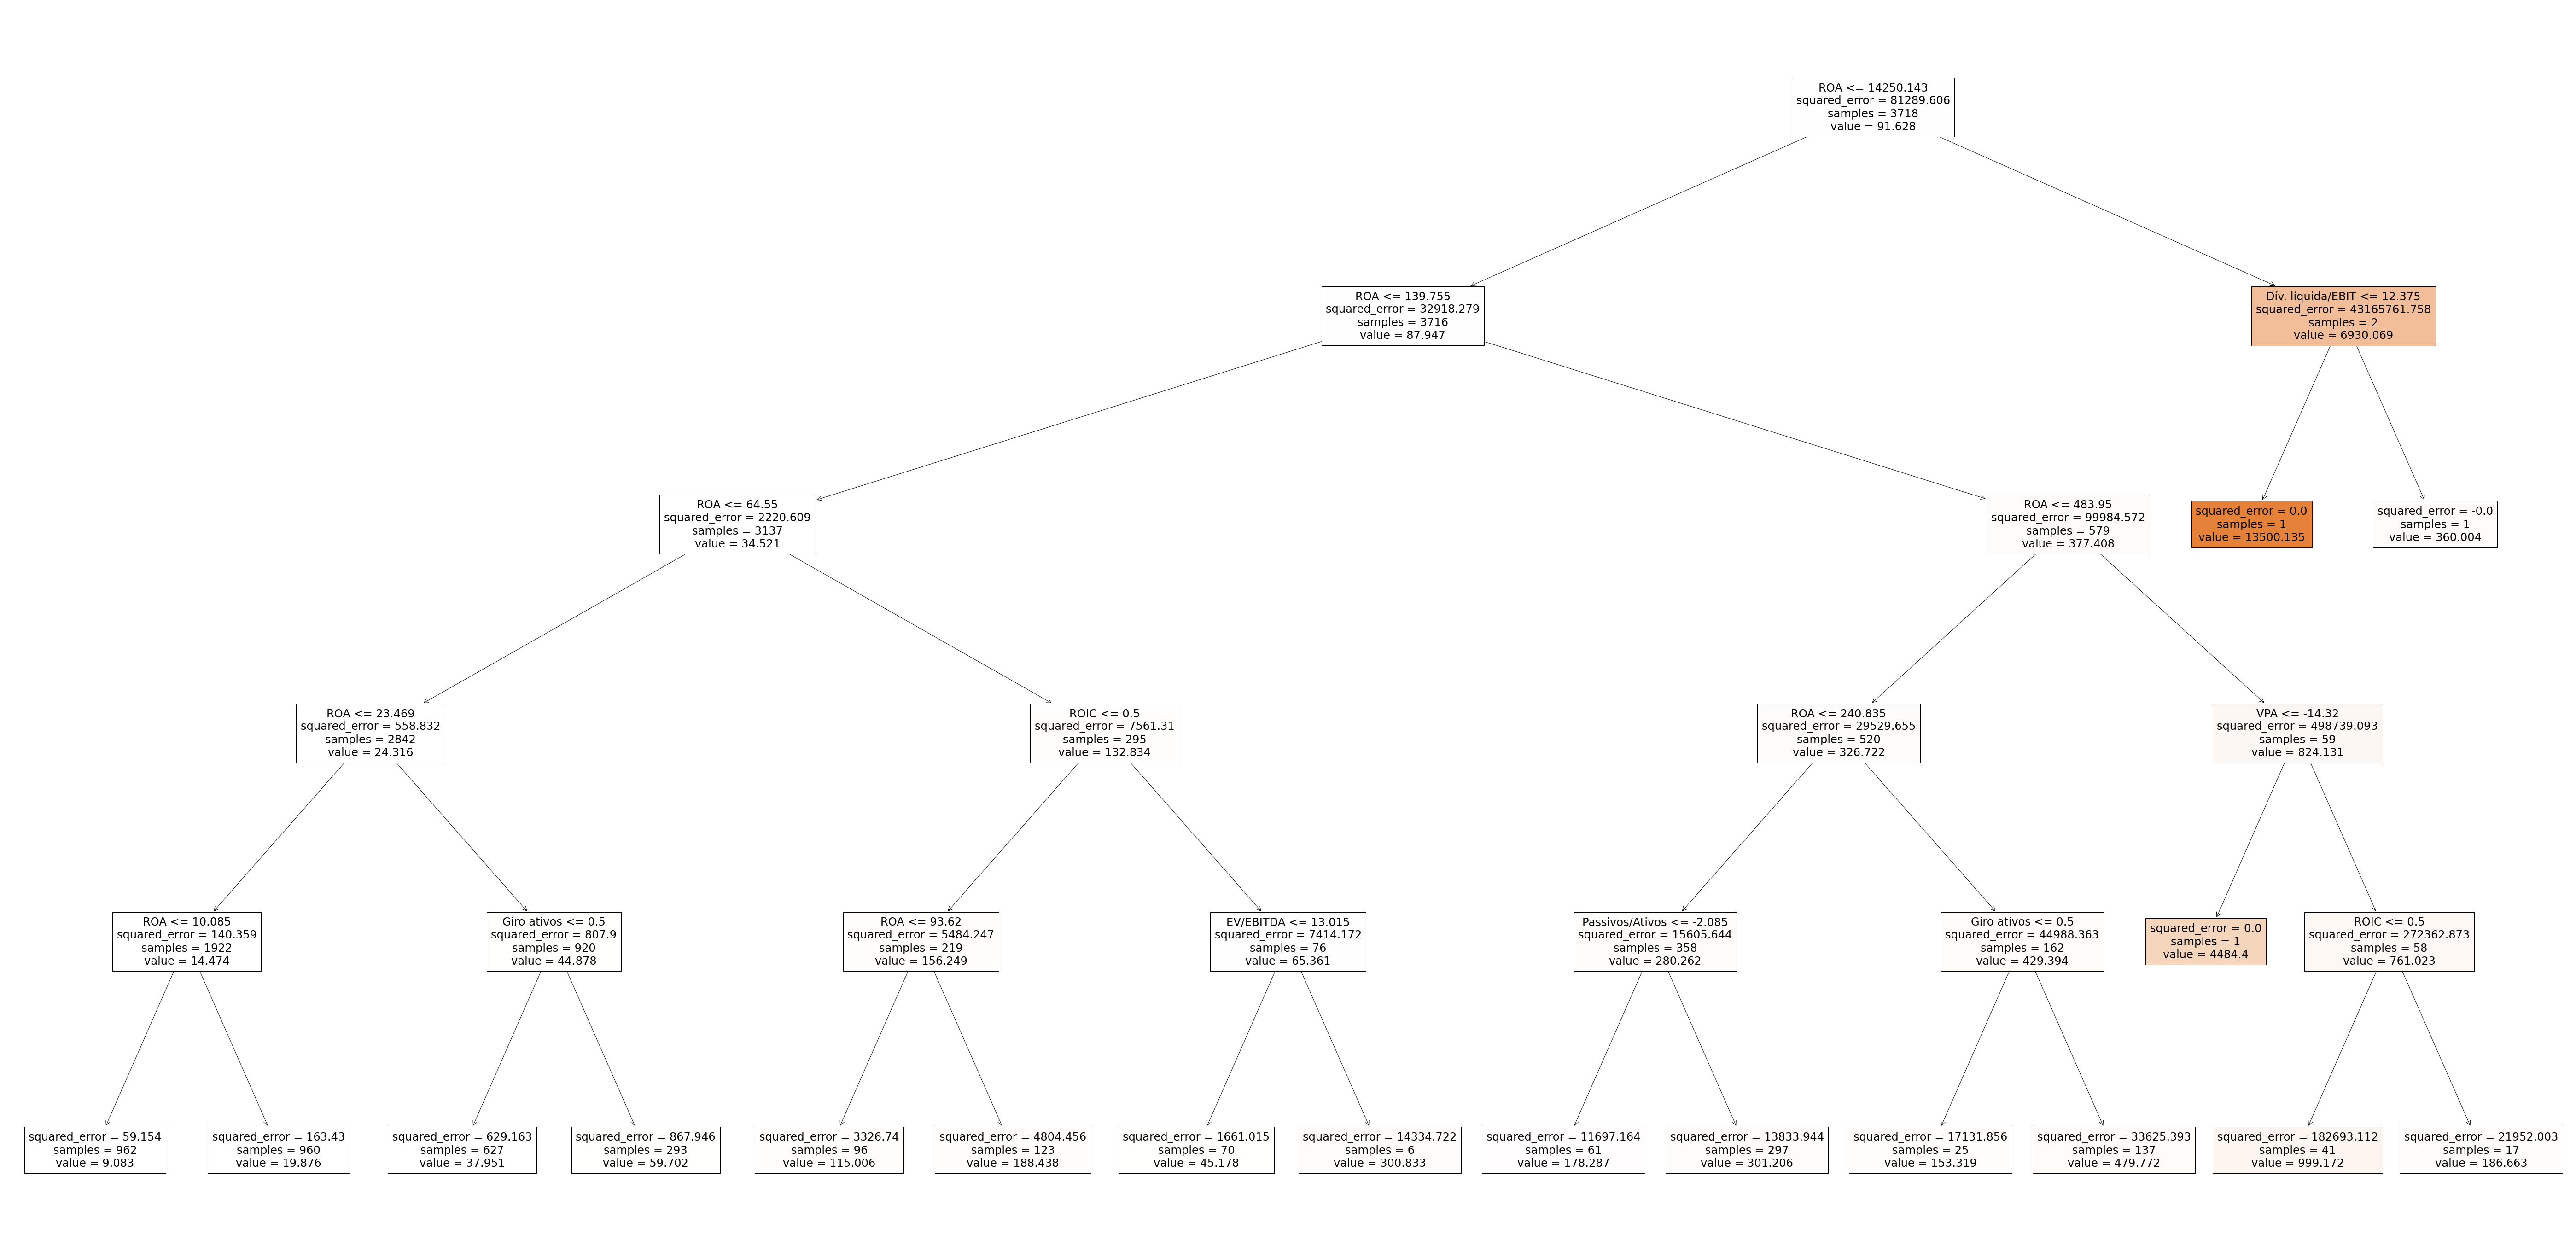

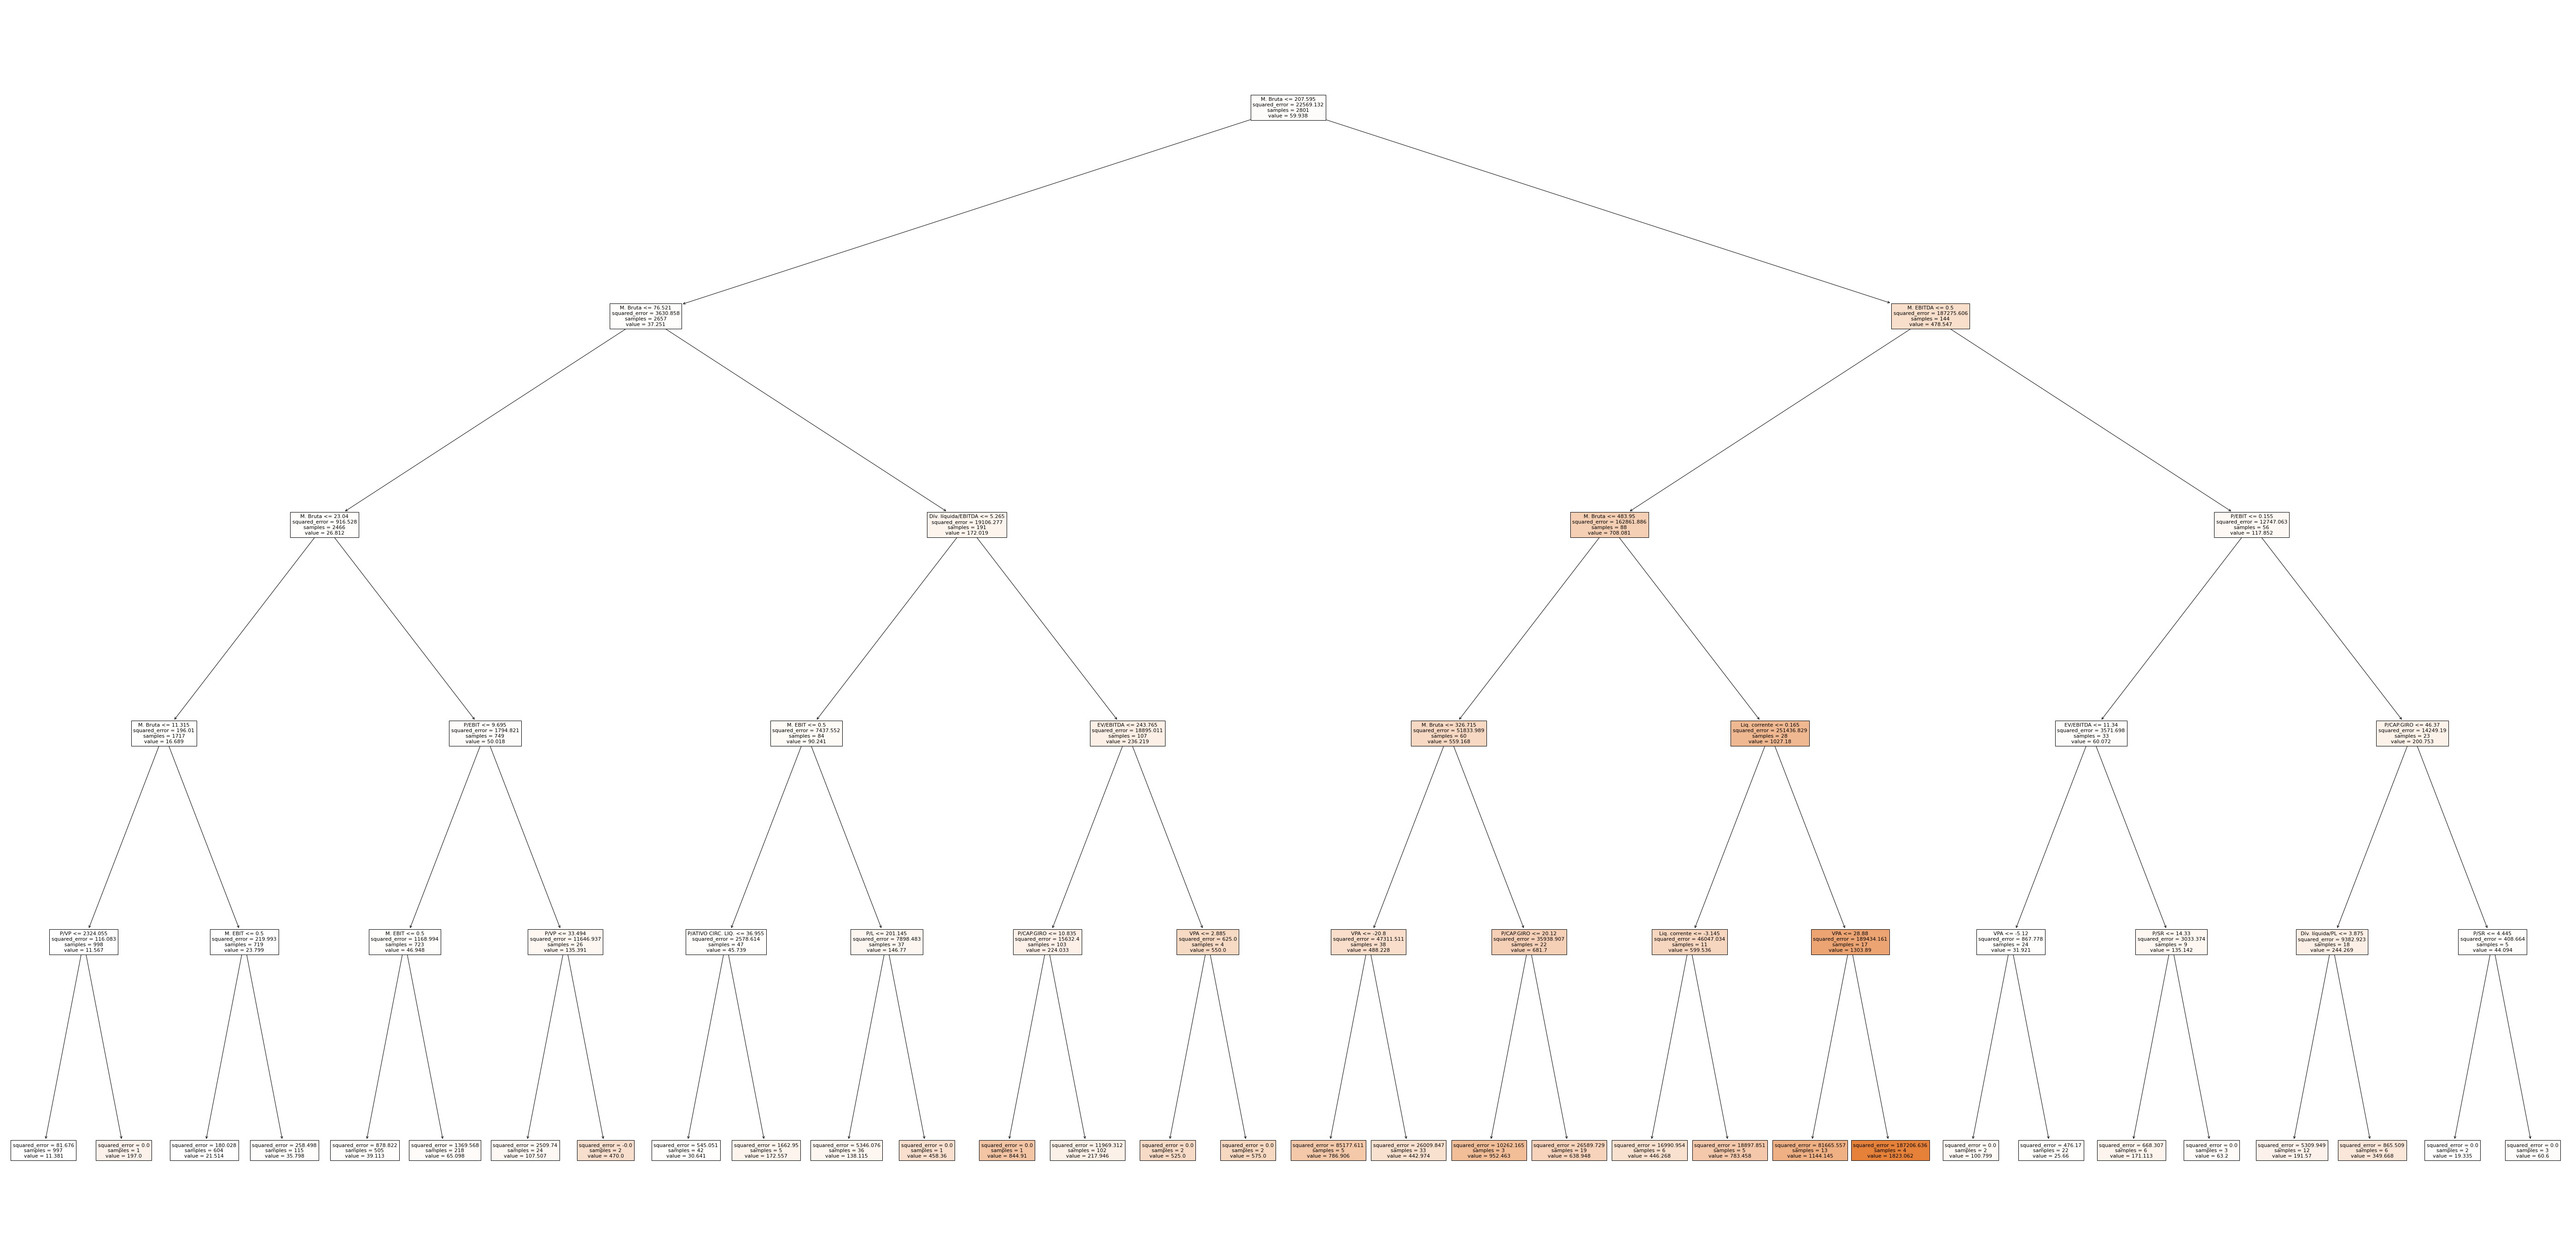

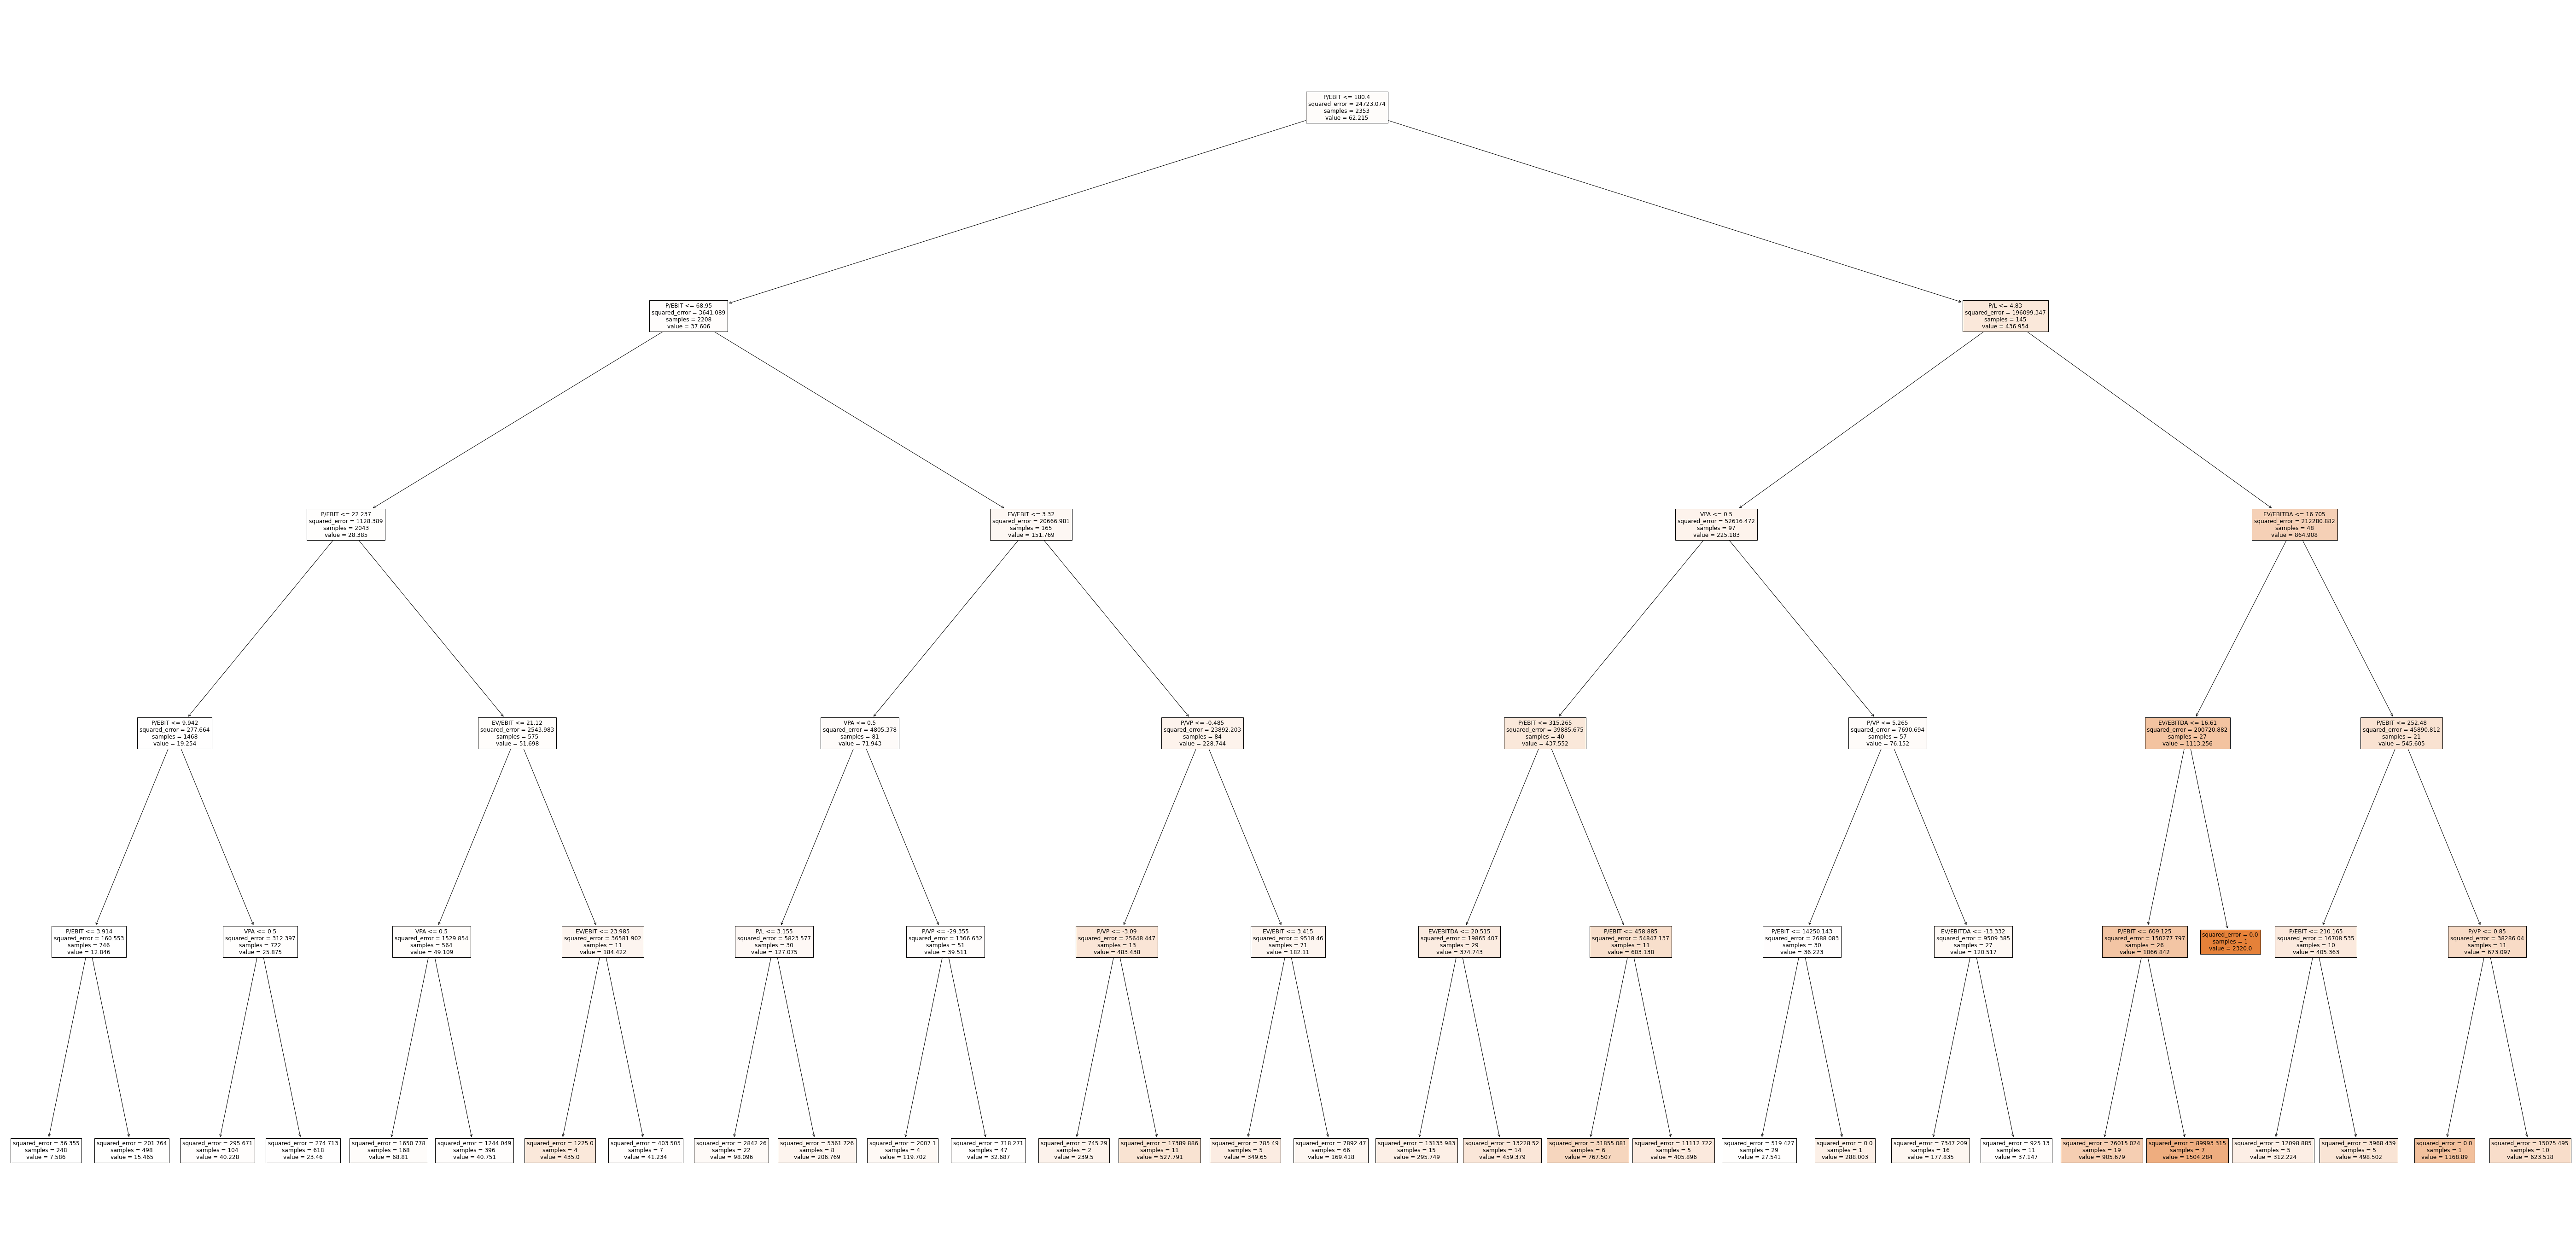

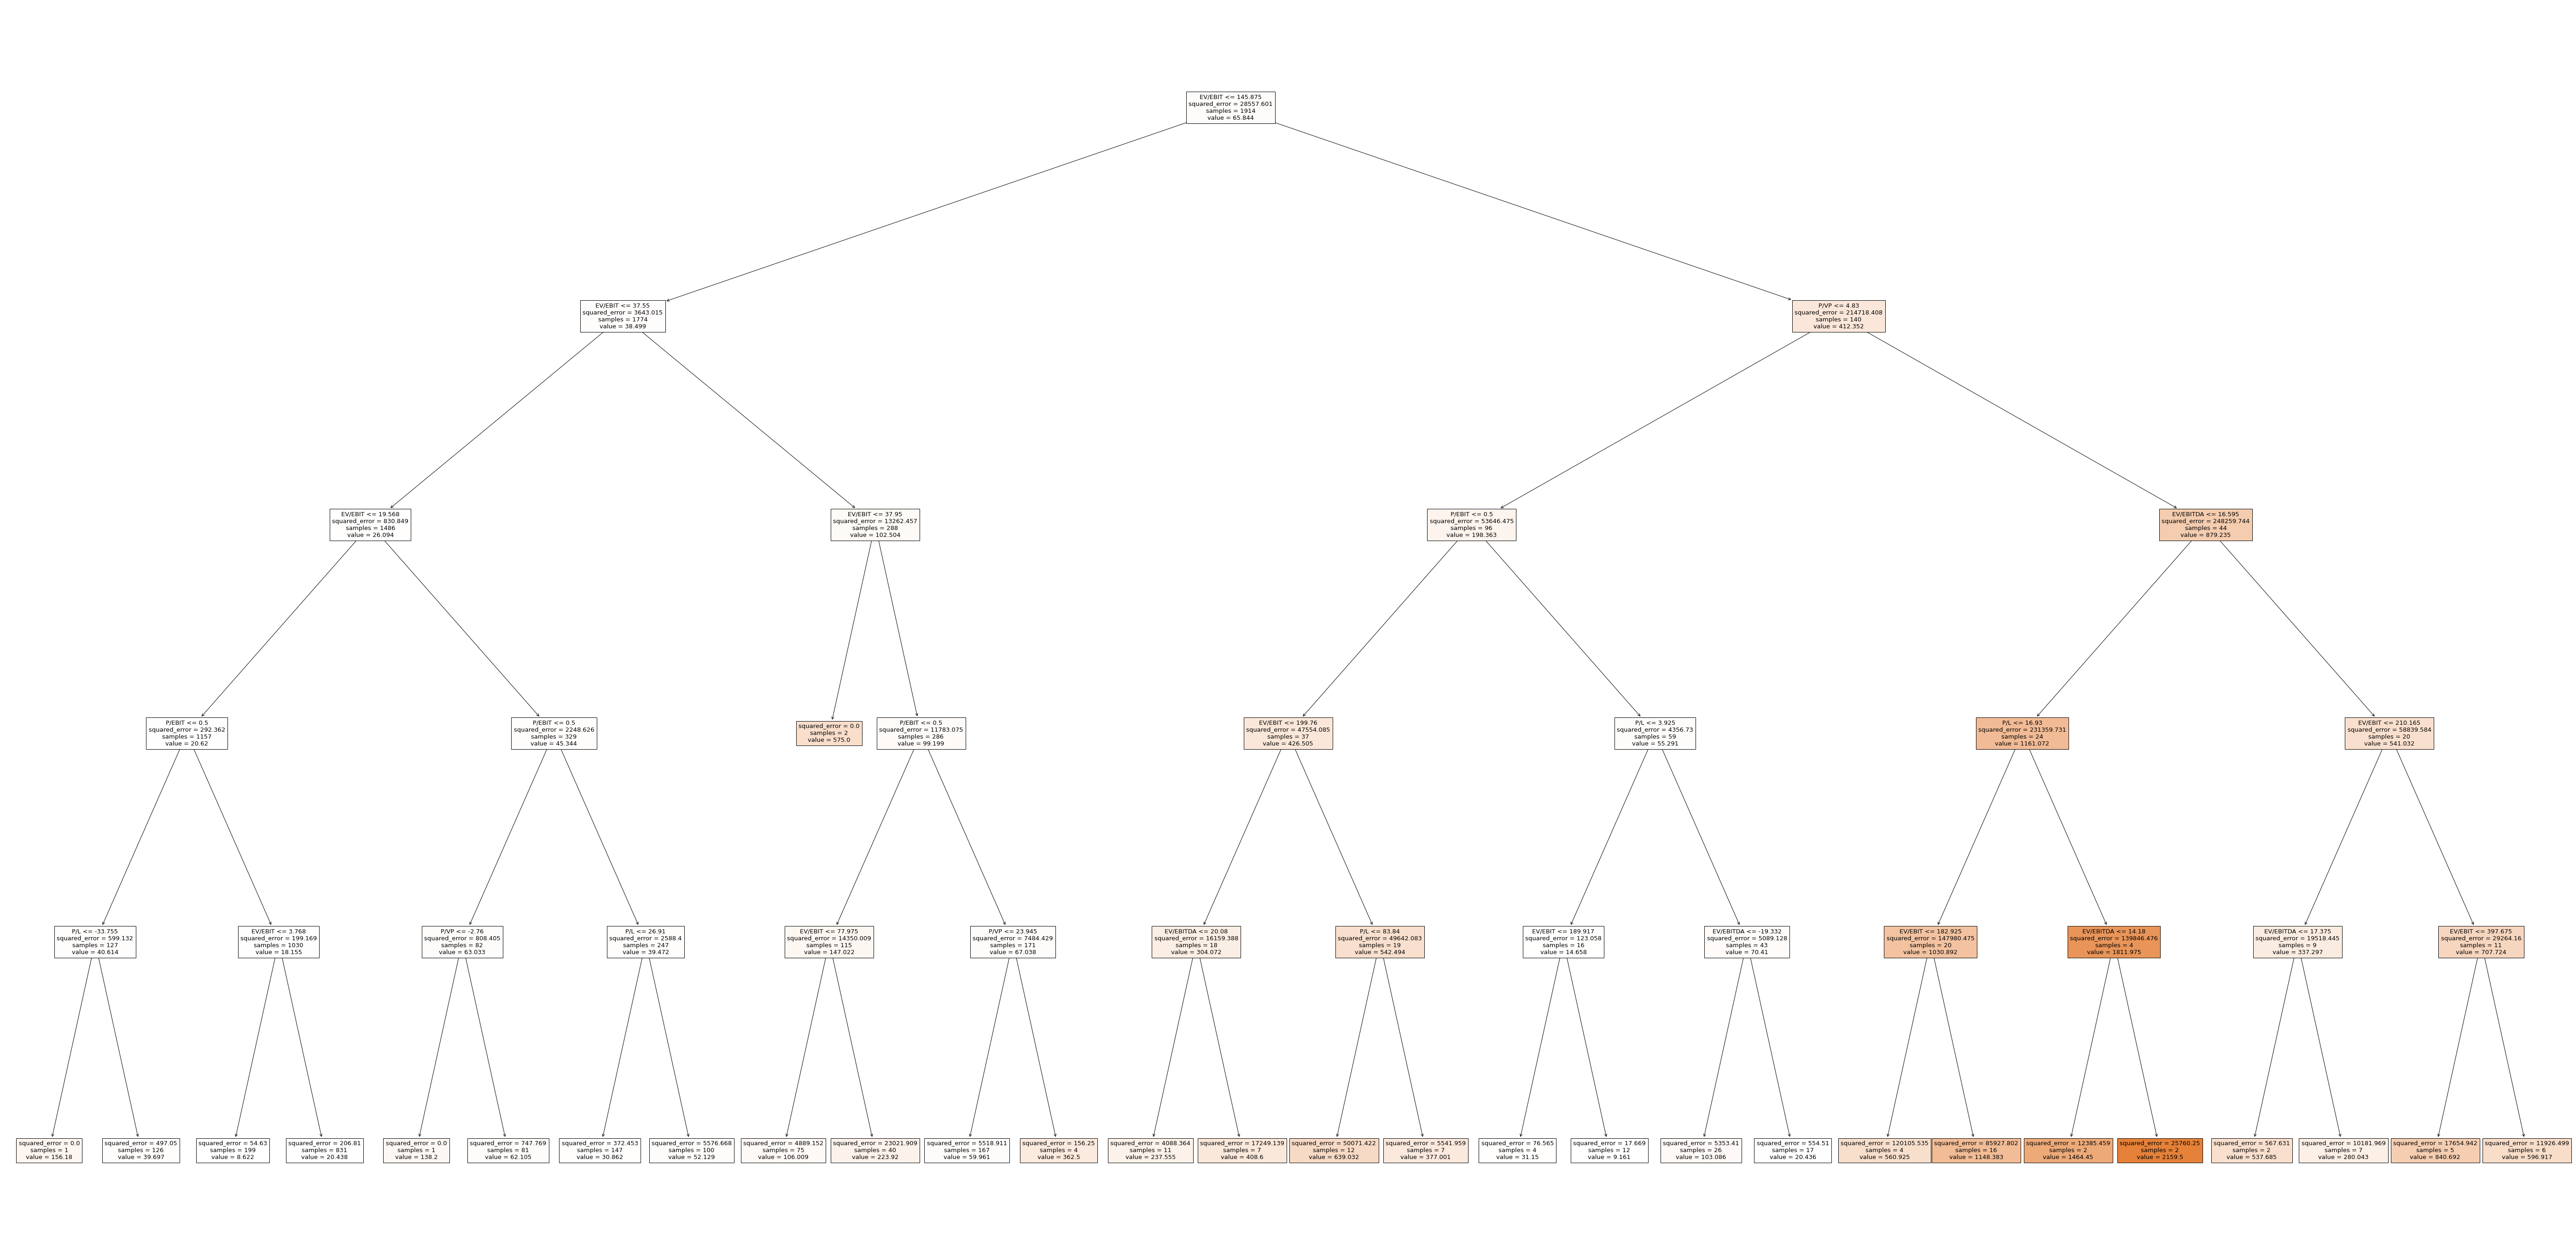

In [10]:
cv_result = []
for i in range(1,6):
    x = dfs[i-1].drop('Open_1', axis=1)
    y = dfs[i-1]['Open_1']
    rfecv = RFECV(DecisionTreeRegressor(max_depth=5), min_features_to_select=5, cv=5)
    
    x_r = rfecv.fit_transform(x,y)
    
    cv_result.append(cross_val_score(DecisionTreeRegressor(max_depth=5), x_r, y, scoring='r2', cv=5))
    
    tree = DecisionTreeRegressor(max_depth=5)
    tree.fit(x_r,y)
    
    fig = plt.figure(figsize=(100,50))
    _ = plot_tree(tree, 
                       feature_names=x.columns,  
                       filled=True)
    plt.savefig("Trees\\tree_{}.jpeg".format(i), bbox_inches='tight')

In [11]:
cv_result

[array([0.46466088, 0.39725735, 0.50828634, 0.76632284, 0.76220687]),
 array([ 0.02474007, -0.16001584,  0.41109135,  0.57332761,  0.55607116]),
 array([-1.06497202, -0.16178559,  0.36772675,  0.70393658,  0.44467637]),
 array([-2.38536485, -0.66863878,  0.50990571,  0.67490533,  0.46866223]),
 array([-3.05099585, -0.80428864, -0.01749425,  0.45791354,  0.43207791])]